In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Data Acquisition:

In [7]:
# Loading Crime Dataset
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [9]:
# Checking the shape of the dataframe
crime_data.shape

(978628, 28)

### 2. Data Inspection:

In [11]:
# Displaying first 5 rows of the dataframe
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [13]:
# Creating Copy of the Dataframe
data_crime = crime_data.copy()

In [15]:
# Creating Copy of the Dataframe
data_crime = crime_data.copy()

In [7]:
# Checking datatypes 
crime_data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2           object
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [17]:
# Printing Columns 
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [19]:
# Information about the Dataframe including the index dtype and columns.
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

### 3. Data Cleaning:

In [10]:
# checking the missing values in crime dataframe
crime_data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           111367
Vict Age               0
Vict Sex          105909
Vict Descent      105917
Premis Cd              9
Premis Desc          476
Weapon Used Cd    526203
Weapon Desc       526203
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          747894
Crm Cd 3          805390
Crm Cd 4          807319
LOCATION               0
Cross Street      678145
LAT                    0
LON                    0
dtype: int64

In [22]:
# functions to drop columns
def drop_columns(df,columns_to_drop):
    return df.drop(columns=columns_to_drop,inplace=True)

def dropna_columns(df,columns_to_drop):
    return df.dropna(subset=columns_to_drop,inplace=True)

In [24]:
# Droping Column
column_to_dropna = ['Crm Cd 1']
dropna_columns(crime_data,column_to_dropna)

In [28]:
# handling the H and - values with x
crime_data['Vict Sex'].replace(to_replace=['H','-'],value='X',inplace=True)
crime_data['Vict Sex'].fillna('X',inplace=True)
print(crime_data['Vict Sex'].unique())

['M' 'X' 'F']


In [30]:
# Gender count 
crime_data['Vict Sex'].value_counts()

Vict Sex
M    395615
F    351882
X    231120
Name: count, dtype: int64

In [32]:
# adding column for - weapon 
crime_data['Weapon Used'] = crime_data['Weapon Used Cd'].apply(lambda x: 1 if pd.notna(x) else 0)

In [34]:
# filling missing values with 'unknown' and '0'
crime_data['Premis Desc'] = crime_data['Premis Desc'].fillna('Unknown')
crime_data['Premis Cd'] = crime_data['Premis Cd'].fillna(0)

In [36]:
# replaced nan values of 'cross street' with '' and added them to Location column 
crime_data['Cross Street'].fillna('',inplace=True)
crime_data['LOCATION'] = crime_data['LOCATION'] + ' ' + crime_data['Cross Street']

In [38]:
# Checking any Null values in the Dataframe
crime_data.isna().sum().sort_values(ascending=False)

Crm Cd 4          978553
Crm Cd 3          976308
Crm Cd 2          909812
Weapon Used Cd    652661
Weapon Desc       652661
Mocodes           143980
Vict Descent      137208
Status                 1
DR_NO                  0
LON                    0
LAT                    0
Cross Street           0
LOCATION               0
Crm Cd 1               0
Status Desc            0
Premis Cd              0
Premis Desc            0
Date Rptd              0
Vict Sex               0
Vict Age               0
Crm Cd Desc            0
Crm Cd                 0
Part 1-2               0
Rpt Dist No            0
AREA NAME              0
AREA                   0
TIME OCC               0
DATE OCC               0
Weapon Used            0
dtype: int64

In [40]:
# converting datetime column 
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])

In [42]:
crime_data1 = crime_data.copy() # Creating copy 

In [44]:
crime_data.shape

(978617, 29)

In [46]:
crime_data['TIME OCC'] = crime_data['TIME OCC'].apply(lambda x: f'{x//100:02}:{x%100:02}')# converting time to hour 

In [48]:
crime_data['Date Time OCC'] = pd.to_datetime(crime_data['DATE OCC'].str.split().str[0]+' '+crime_data['TIME OCC'].astype(str))

In [50]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd']) # converting time to hour minute format
crime_data['Date Time OCC'] = pd.to_datetime(crime_data['Date Time OCC'])

In [52]:
temp = crime_data.pop('Date Time OCC')
crime_data.insert(2,'Date Time OCC',temp)
# rearranging columns

In [54]:
print(crime_data['Vict Descent'].value_counts())
print('The missing values in Vict Descent column:',crime_data['Vict Descent'].isna().sum())

Vict Descent
H    291861
W    196427
B    133902
X    102560
O     76476
A     20987
K      5620
F      4508
C      4225
J      1473
V      1113
I       962
Z       524
P       275
U       210
D        86
G        72
L        71
S        55
-         2
Name: count, dtype: int64
The missing values in Vict Descent column: 137208


In [56]:
crime_data['Vict Descent'].fillna('X',inplace=True)
crime_data['Vict Descent'].replace(to_replace='-',value='X',inplace=True) # filling and replacing missing/unknown values

In [58]:
crime_data = crime_data[crime_data['Vict Age'].between(0, 100)]

In [60]:
column_to_drop=['Crm Cd 2','Crm Cd 3','Crm Cd 4','AREA','Part 1-2','Cross Street','DATE OCC','TIME OCC',
                'Weapon Used Cd','Weapon Desc','Mocodes']
drop_columns(crime_data,column_to_drop)

In [62]:
print('The nan values in dataset:\n',crime_data.isna().sum())
print('\nThe shape of cleaned dataset:\n',crime_data.shape)
# the cleaned dataset with no duplicates

The nan values in dataset:
 DR_NO            0
Date Rptd        0
Date Time OCC    0
AREA NAME        0
Rpt Dist No      0
Crm Cd           0
Crm Cd Desc      0
Vict Age         0
Vict Sex         0
Vict Descent     0
Premis Cd        0
Premis Desc      0
Status           1
Status Desc      0
Crm Cd 1         0
LOCATION         0
LAT              0
LON              0
Weapon Used      0
dtype: int64

The shape of cleaned dataset:
 (978483, 19)


In [31]:
crime_data.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0


In [64]:
crime_data['Year'] = crime_data['Date Time OCC'].dt.year
crime_data['Month'] = crime_data['Date Time OCC'].dt.month
crime_data['Year_Month'] = crime_data['Date Time OCC'].dt.strftime('%Y-%m')

In [66]:
# Converting Time column into hours and minutes
crime_data1['TIME OCC'] = crime_data1['TIME OCC'].apply(lambda x: f'{x//100:02}:{x%100:02}')

In [68]:
crime_data1['DATE OCC'] = pd.to_datetime(crime_data1['DATE OCC']) # Converting into Date time format
crime_data1.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weapon Used
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,,34.0375,-118.3506,0
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,,34.0444,-118.2628,0
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,,34.0210,-118.3002,0
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,,34.1576,-118.4387,0
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,,34.0944,-118.3277,0


In [70]:
crime_data.to_csv('Cleaned_df.csv',index=False) # cleaned data_set

# 4. Exploratory Data Analysis (EDA):

In [73]:
crime_data = pd.read_csv('Cleaned_df.csv')
data_crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime_data.head() # Cleaned data_set

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month
0,190326475,2020-03-01,2020-03-01 21:30:00,Wilshire,784,510,VEHICLE - STOLEN,0,M,O,...,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,0,2020,3,2020-03
1,200106753,2020-02-09,2020-02-08 18:00:00,Central,182,330,BURGLARY FROM VEHICLE,47,M,O,...,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,0,2020,2,2020-02
2,200320258,2020-11-11,2020-11-04 17:00:00,Southwest,356,480,BIKE - STOLEN,19,X,X,...,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,0,2020,11,2020-11
3,200907217,2023-05-10,2020-03-10 20:37:00,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,...,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,0,2020,3,2020-03
4,220614831,2022-08-18,2020-08-17 12:00:00,Hollywood,666,354,THEFT OF IDENTITY,28,M,H,...,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,0,2020,8,2020-08


# Visualize overall crime trends from 2020 to the present year

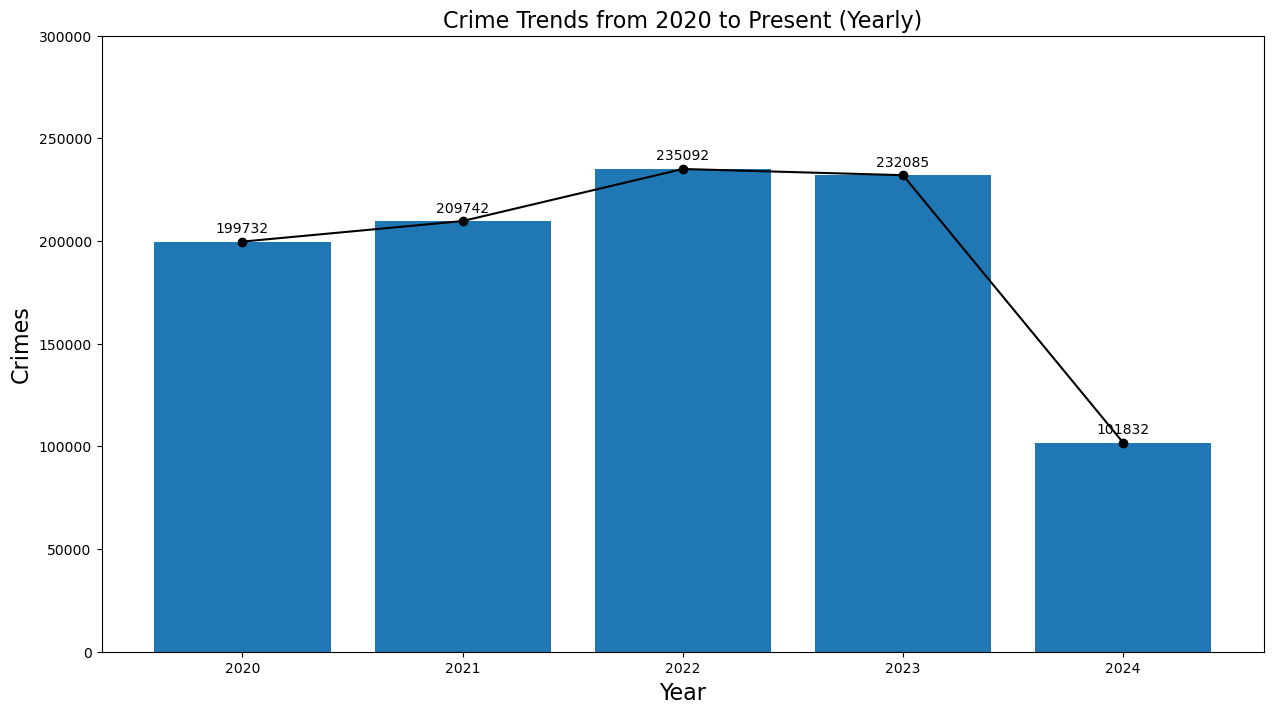

In [76]:
yearly_crime_counts = crime_data.groupby('Year').size().reset_index(name='Crime Counts') # yearly crime count

plt.figure(figsize=(15, 8))
bars = plt.bar(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'])
plt.ylim(0, 300000)

plt.plot(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'], color='black', marker='o')

for x, y in zip(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts']):
    plt.text(x, y + 0.01 * 300000, f'{y}', ha='center', va='bottom')

plt.title('Crime Trends from 2020 to Present (Yearly)', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Crimes', fontsize = 16)
# plt.grid(axis='y')
plt.show()

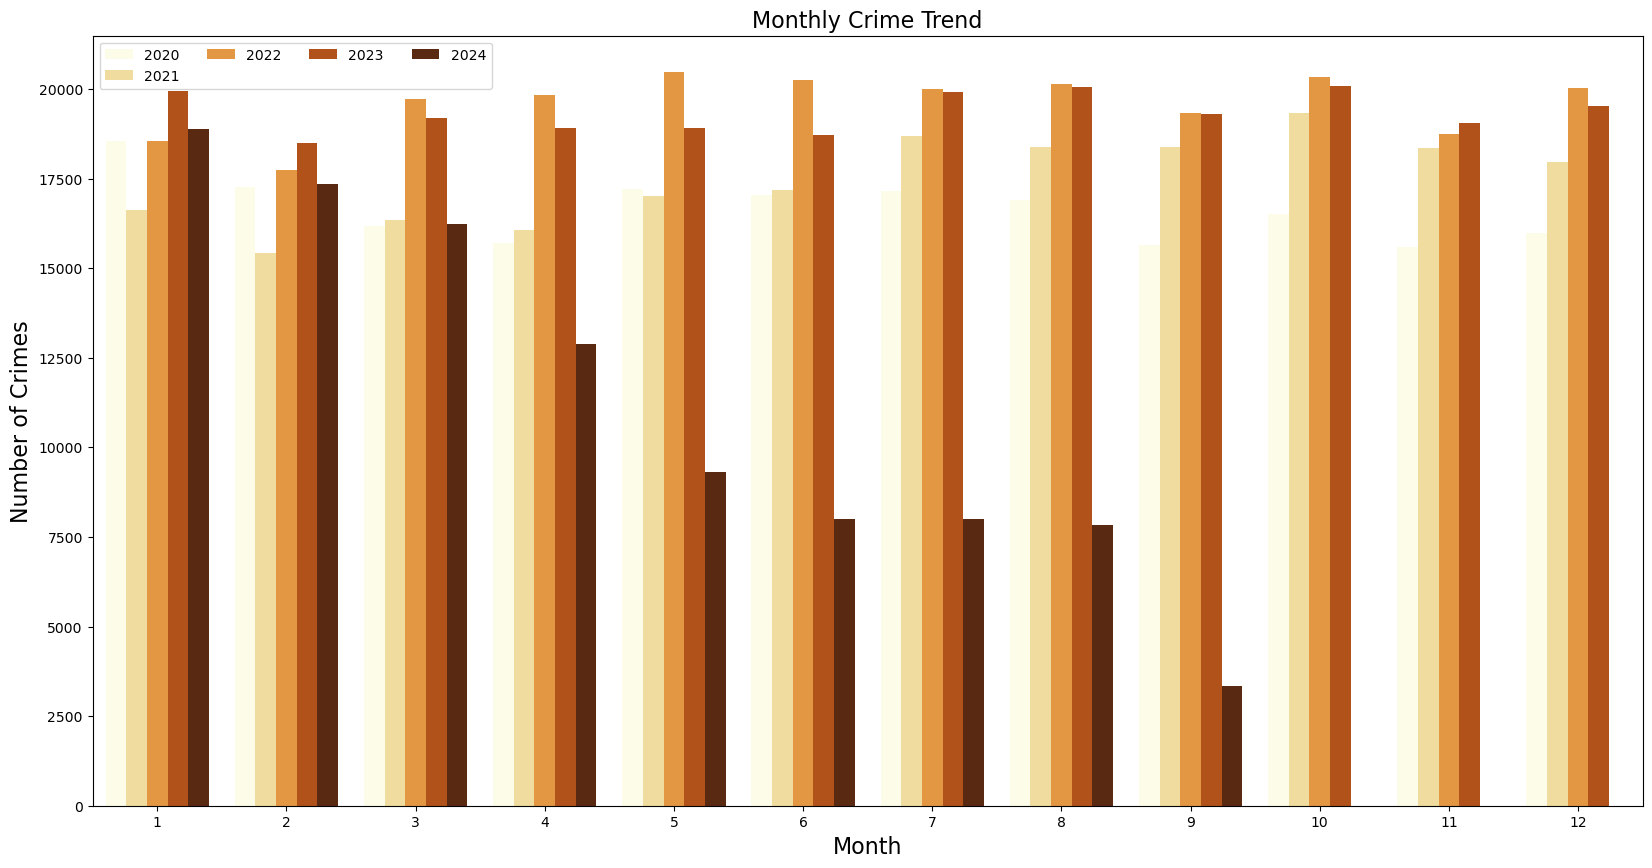

In [79]:
plt.figure(figsize=(20,10))
sns.countplot(data=crime_data, x='Month', hue='Year', palette='YlOrBr')
plt.title('Monthly Crime Trend',fontsize = 16)
plt.legend(ncol = 4) 
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)  ## Monthly Crime 
plt.show()

# Analyze and visualize seasonal patterns in crime data.

In [81]:
# Grouping the monthly average crime
monthly_avg = crime_data.groupby(crime_data['Month']).size()

In [83]:
# Displaying Descriptive Statistics for Monthly crime
print("Descriptive Statistics for Monthly Crimes:")
print(monthly_avg.describe())

Descriptive Statistics for Monthly Crimes:
count       12.00000
mean     81540.25000
std       6135.91687
min      71730.00000
25%      76186.00000
50%      83108.50000
75%      84377.50000
max      92509.00000
dtype: float64


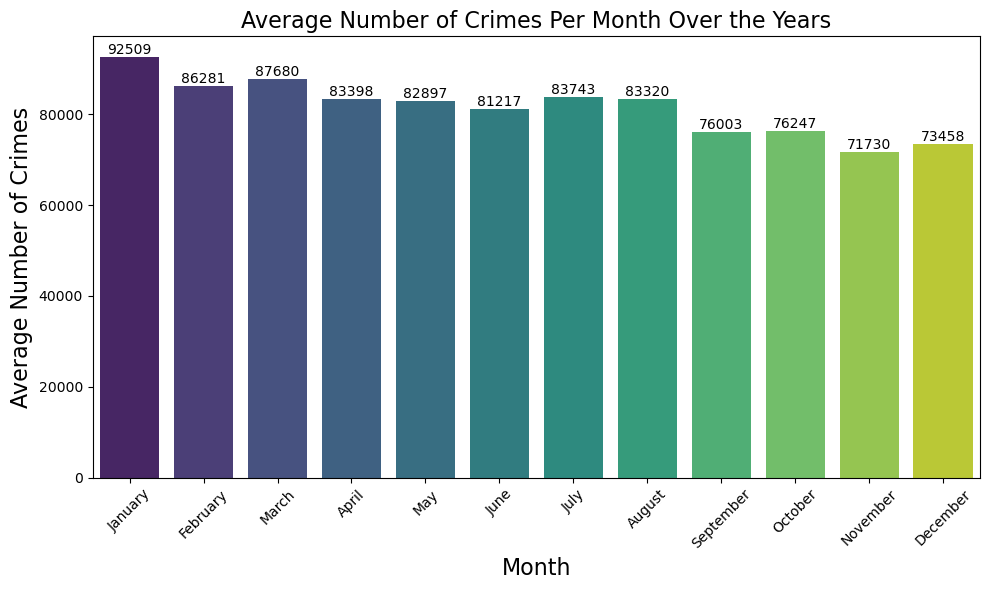

In [85]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=monthly_avg.reset_index(), x='Month', y=0, palette='viridis')
plt.title('Average Number of Crimes Per Month Over the Years', fontsize = 16)
plt.ylabel('Average Number of Crimes', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()  # Average Number of Crime in Month Over a Year 

# # Displaying most common type of crimes


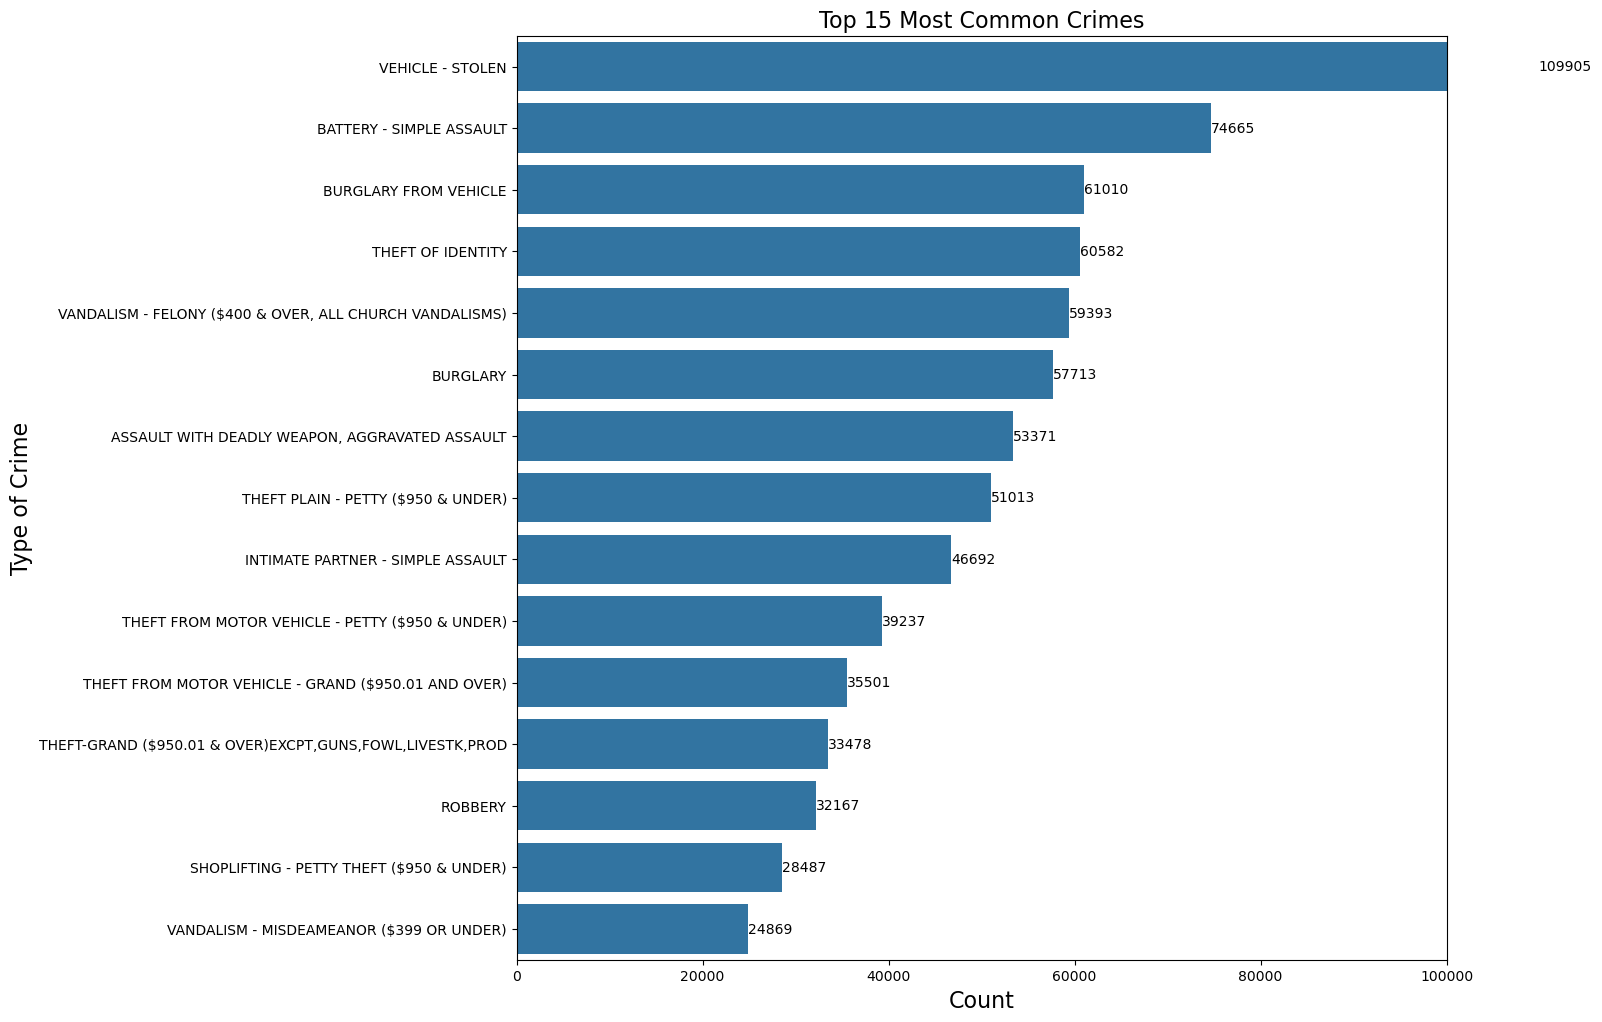

In [90]:
plt.figure(figsize=(12, 12))

top_crimes = crime_data['Crm Cd Desc'].value_counts().nlargest(15)

crime_plot = sns.countplot(data=crime_data, y='Crm Cd Desc',order=top_crimes.index)

plt.title('Top 15 Most Common Crimes', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.ylabel('Type of Crime', fontsize = 16)
plt.xlim(0, 100000)

for bar in crime_plot.patches:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}', 
        va='center'
    )
plt.show()  # Most Common Type Of Crime

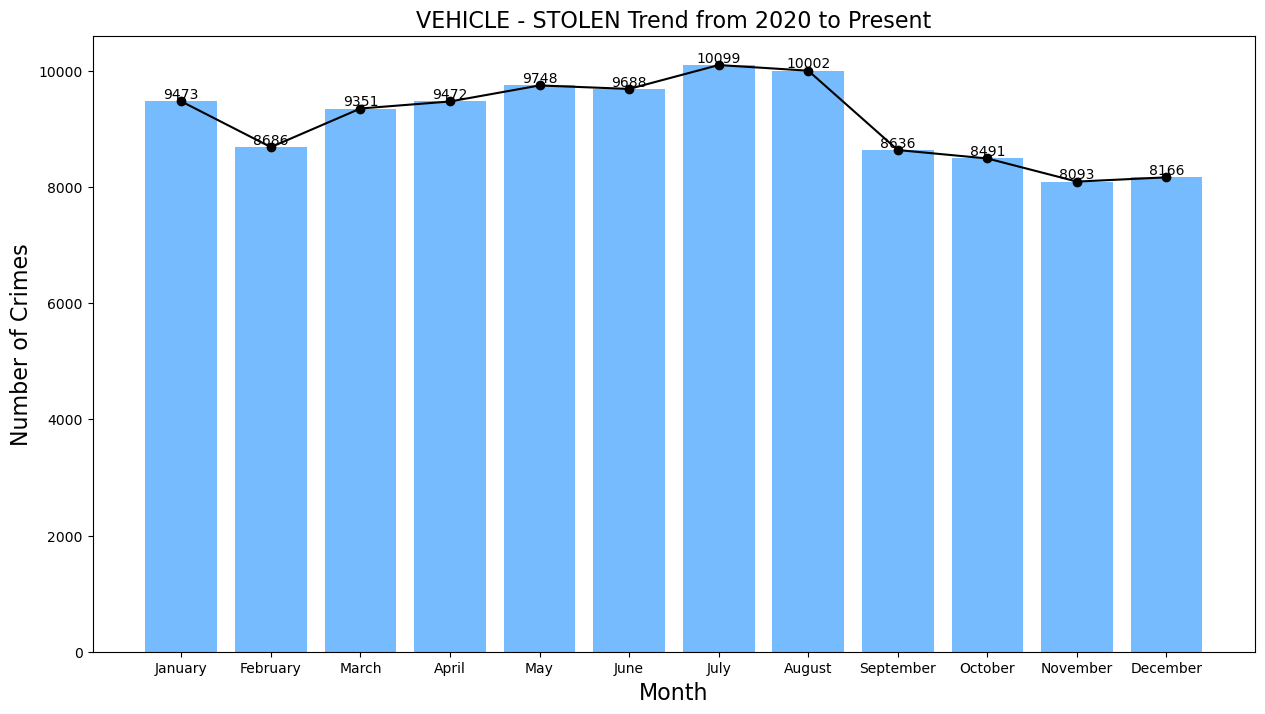

In [92]:
# Displaying Top crime pattern over the years
top_crime = crime_data['Crm Cd Desc'].value_counts().index[0]

filtered_data = crime_data[crime_data['Crm Cd Desc'] == top_crime]

monthly_trend = filtered_data.groupby('Month').size().reset_index(name='Counts')

monthly_trend.sort_values('Month', inplace=True)

monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(15, 8))
bars = plt.bar(monthly_trend['Month'], monthly_trend['Counts'], color='xkcd:sky blue')
plt.plot(monthly_trend['Month'], monthly_trend['Counts'], color='black', marker='o')

for x, y in zip(monthly_trend['Month'], monthly_trend['Counts']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.title(f'{top_crime} Trend from 2020 to Present', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()

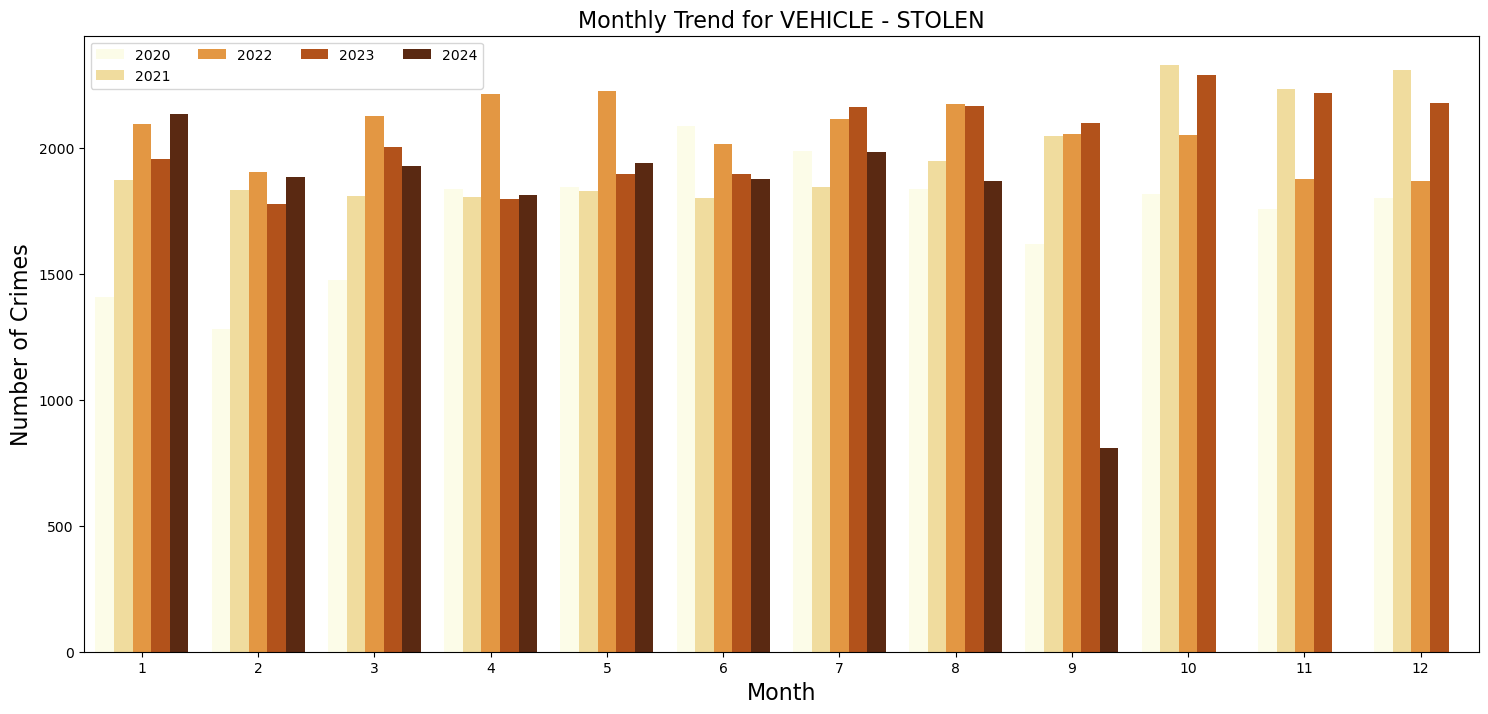

In [94]:
                        #Monthly Trend for Vehicle - Stolen
top_crime = crime_data['Crm Cd Desc'].value_counts().index[0]
filtered_data = crime_data[crime_data['Crm Cd Desc'] == top_crime]
plt.figure(figsize=(18, 8))
sns.countplot(data=filtered_data, x='Month', hue='Year', palette='YlOrBr')
plt.title(f'Monthly Trend for {top_crime}', fontsize = 16)
plt.legend(ncol = 4) 
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()

# Displaying any notable differences in crime rates between regions or cities

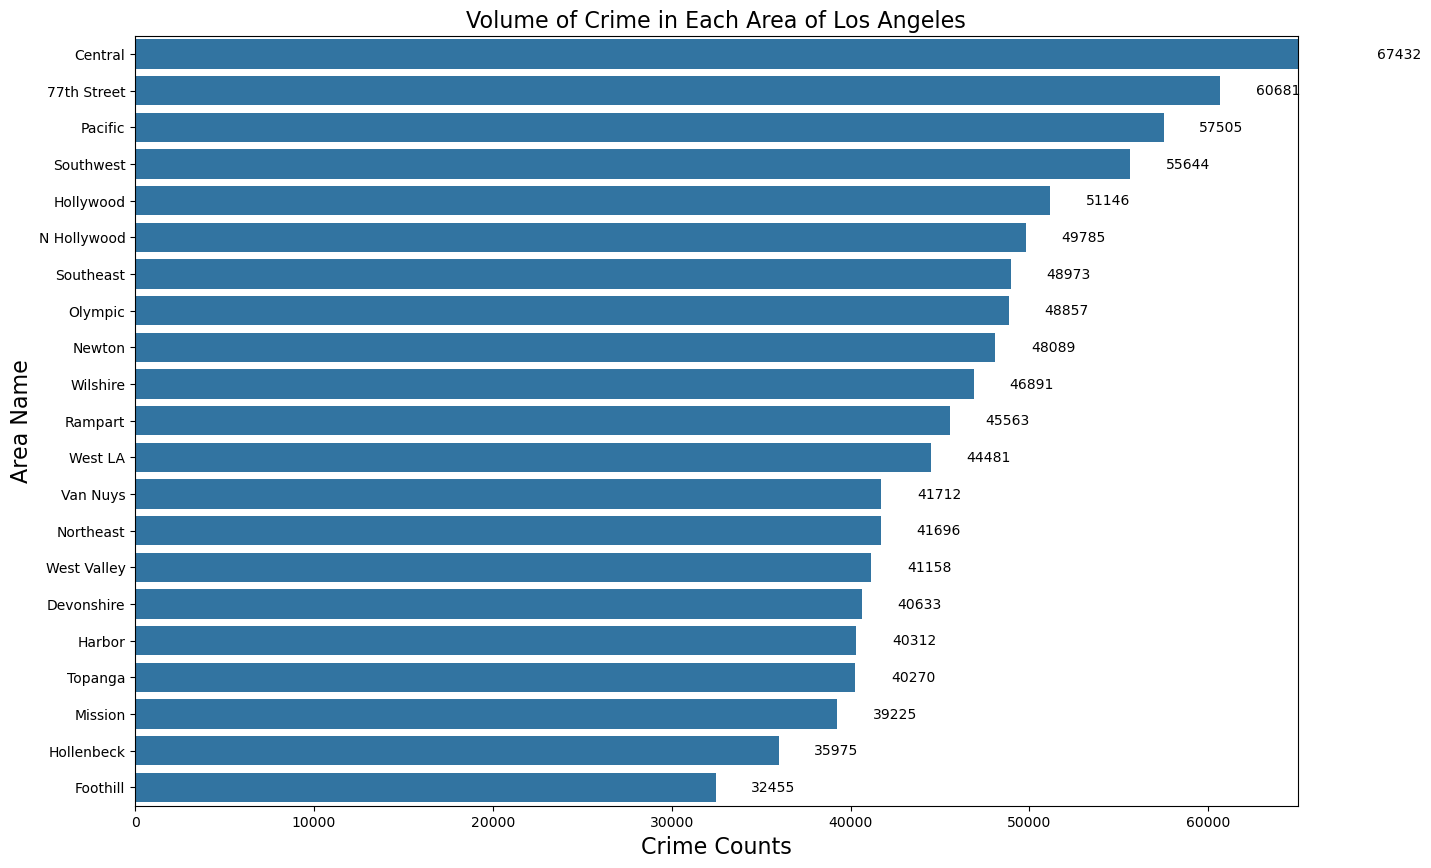

In [97]:
plt.figure(figsize=(15, 10))

order = crime_data['AREA NAME'].value_counts().index
sns.countplot(y='AREA NAME', data=crime_data, order=order)

plt.xlabel('Crime Counts', fontsize = 16)
plt.ylabel('Area Name', fontsize = 16)
plt.title('Volume of Crime in Each Area of Los Angeles', fontsize = 16)
plt.xlim(0,65000)

# Adding the count at the end of each bar
for bar in plt.gca().patches:
    plt.text(bar.get_width() + 2000,  # Adding 2000 to move the text slightly right
             bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())),
             va="center")

plt.show()


In [99]:
# Crime statistics based on area name
statistics = crime_data['AREA NAME'].value_counts().describe()
print(statistics)

count       21.000000
mean     46594.428571
std       8492.627029
min      32455.000000
25%      40633.000000
50%      45563.000000
75%      49785.000000
max      67432.000000
Name: count, dtype: float64


# Analyze the relationship between the day of the week and the frequency of certain
# types of crimes.

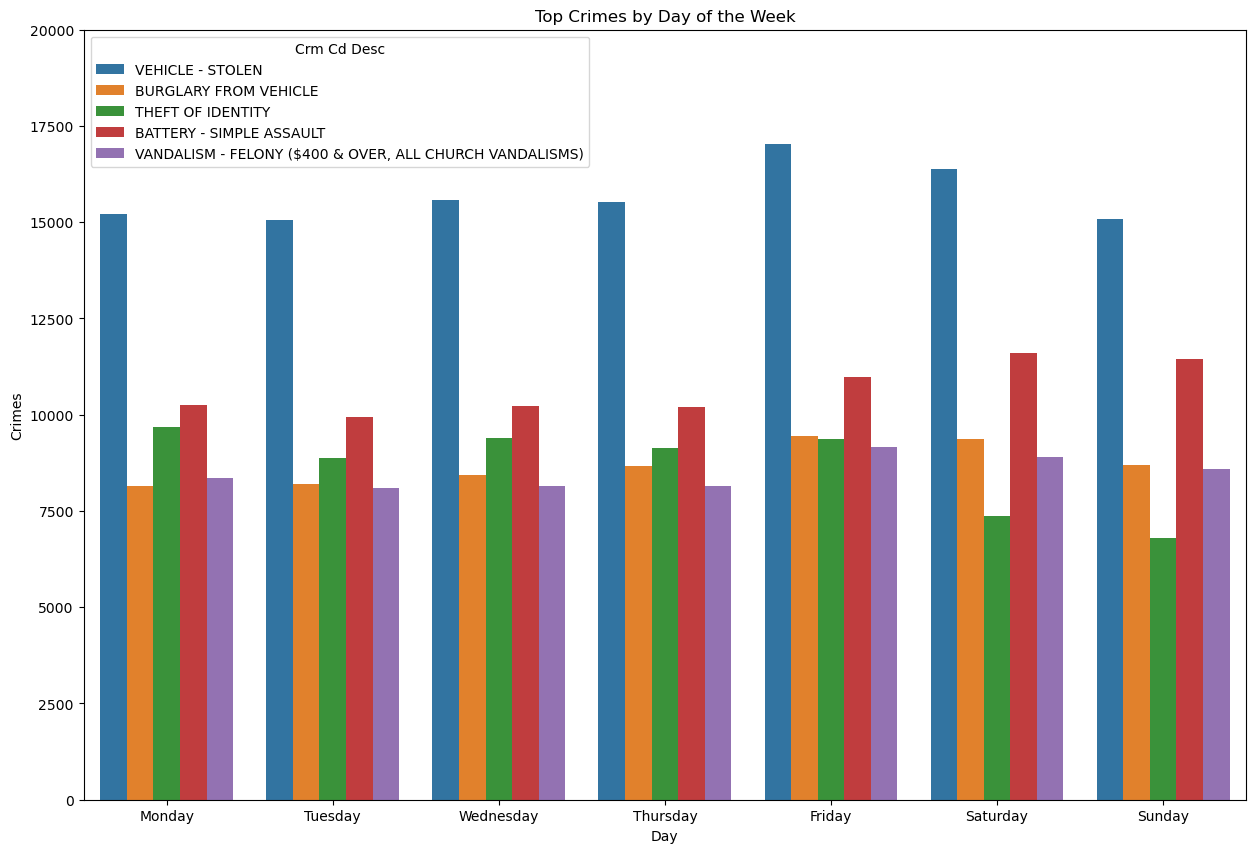

In [102]:
crime_data['Date Time OCC'] = pd.to_datetime(crime_data['Date Time OCC'])
crime_data['DayOfWeek'] = crime_data['Date Time OCC'].dt.day_name()
top_crimes = crime_data['Crm Cd Desc'].value_counts().index[:5]
filtered_df = crime_data[crime_data['Crm Cd Desc'].isin(top_crimes)]

order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 10))
sns.countplot(x='DayOfWeek', hue='Crm Cd Desc', data=filtered_df, order=order_days)
plt.title('Top Crimes by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Crimes')
plt.ylim(0, 20000)
plt.show()

# Investigate any impact of significant events or policy changes on crime rates.


In [105]:
us_election = crime_data.loc[(crime_data['Date Time OCC'] >= '2020-10-01') & (crime_data['Date Time OCC'] < '2021-02-28')]


In [107]:
us_election['Date Time OCC'] = pd.to_datetime(us_election['Date Time OCC'])
us_election_count = us_election['Date Time OCC'].dt.date.value_counts().sort_index()
us_election_count

Date Time OCC
2020-10-01    731
2020-10-02    571
2020-10-03    542
2020-10-04    506
2020-10-05    525
             ... 
2021-02-23    542
2021-02-24    531
2021-02-25    543
2021-02-26    622
2021-02-27    580
Name: count, Length: 150, dtype: int64

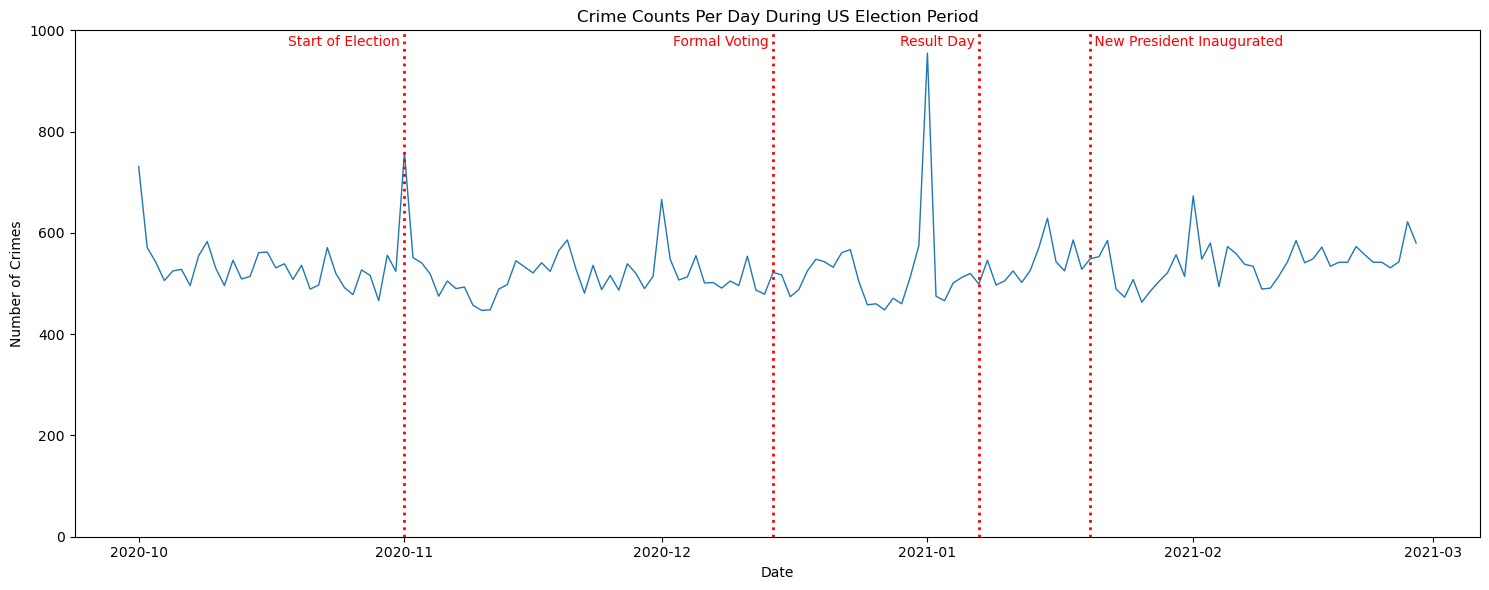

In [109]:
import matplotlib.pyplot as plt   # plotting specific event
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(us_election_count, linestyle='-', linewidth=1)

ax.set_title('Crime Counts Per Day During US Election Period')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

election_start = pd.to_datetime('2020-11-01')
formal_voting = pd.to_datetime('2020-12-14')
result_day = pd.to_datetime('2021-01-07')
inauguration_day = pd.to_datetime('2021-01-20')

ax.axvline(x=election_start, color='red', linestyle=':', linewidth=2)
ax.axvline(x=formal_voting, color='red', linestyle=':', linewidth=2)
ax.axvline(x=result_day, color='red', linestyle=':', linewidth=2)
ax.axvline(x=inauguration_day, color='red', linestyle=':', linewidth=2)

ax.annotate('Start of Election ', xy=(election_start, 950), xytext=(election_start, 970),
             ha='right', color='red')

ax.annotate('Formal Voting ', xy=(formal_voting, 950), xytext=(formal_voting, 970),
             ha='right', color='red')

ax.annotate('Result Day ', xy=(result_day, 950), xytext=(result_day, 970),
             ha='right', color='red')

ax.annotate(' New President Inaugurated', xy=(inauguration_day, 950), xytext=(inauguration_day, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()

In [113]:
# event based on specific events 
Covid = crime_data.loc[(crime_data['Date Time OCC'] >= '2020-01-01') & (crime_data['Date Time OCC'] < '2022-06-01')]


In [115]:
Covid['Date Time OCC'] = pd.to_datetime(Covid['Date Time OCC'])
Covid_count = Covid['Date Time OCC'].dt.date.value_counts().sort_index()
Covid_count

Date Time OCC
2020-01-01    1149
2020-01-02     526
2020-01-03     596
2020-01-04     541
2020-01-05     505
              ... 
2022-05-27     675
2022-05-28     685
2022-05-29     653
2022-05-30     580
2022-05-31     585
Name: count, Length: 882, dtype: int64

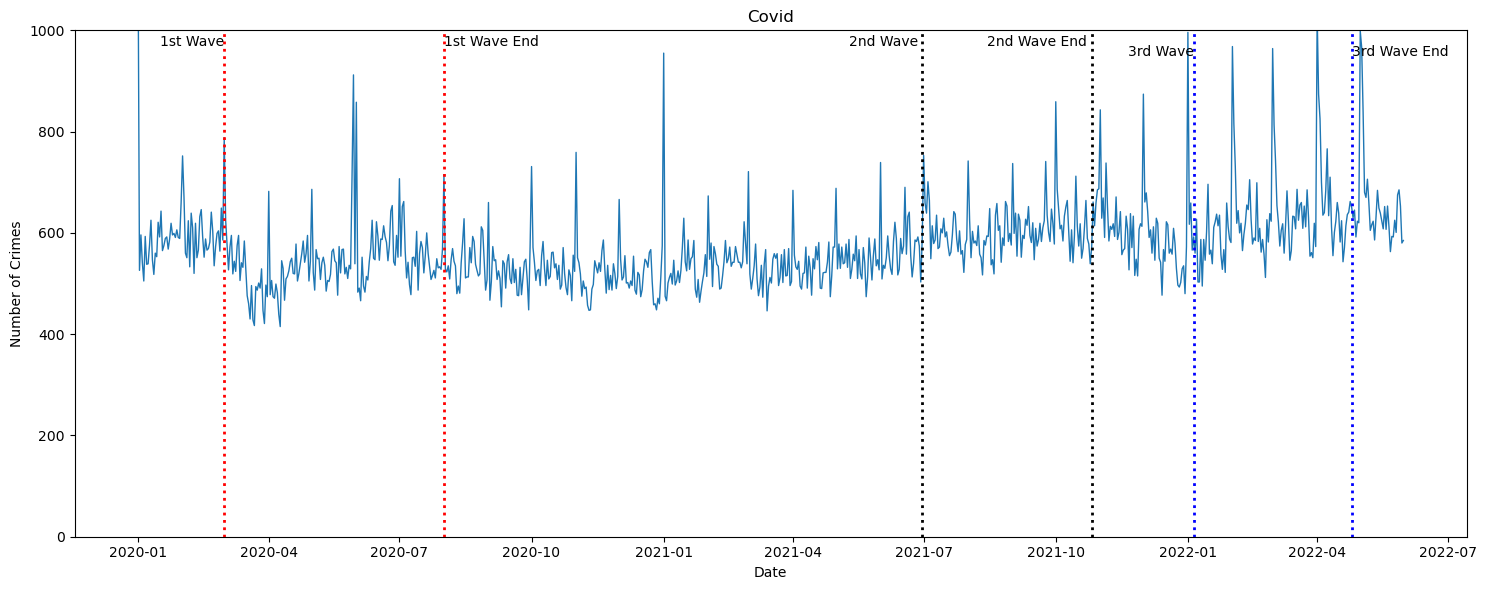

In [117]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(Covid_count, linestyle='-', linewidth=1)

ax.set_title('Covid')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

First_wave = pd.to_datetime('2020-03-01')
FirstWave_ended = pd.to_datetime('2020-08-01')
Second_wave= pd.to_datetime('2021-06-30')
Secondwave_ended= pd.to_datetime('2021-10-26')
Third_wave= pd.to_datetime('2022-01-05')
Thirdwave_ended= pd.to_datetime('2022-04-25')


ax.axvline(x=First_wave, color='red', linestyle=':', linewidth=2)
ax.axvline(x=FirstWave_ended, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Second_wave, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Secondwave_ended, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Third_wave, color='blue', linestyle=':', linewidth=2)
ax.axvline(x=Thirdwave_ended, color='blue', linestyle=':', linewidth=2)

ax.annotate('1st Wave', xy=(First_wave, 950), xytext=(First_wave, 970),
             ha='right', color='black')

ax.annotate('1st Wave End', xy=(FirstWave_ended, 950), xytext=(FirstWave_ended, 970),
             ha='left', color='black')

ax.annotate('2nd Wave ', xy=(Second_wave, 950), xytext=(Second_wave, 970),
             ha='right', color='black')
ax.annotate('2nd Wave End ', xy=(Secondwave_ended, 950), xytext=(Secondwave_ended, 970),
             ha='right', color='black')

ax.annotate('3rd Wave', xy=(Third_wave, 950), xytext=(Third_wave, 950),
             ha='right', color='black')

ax.annotate('3rd Wave End', xy=(Thirdwave_ended, 950), xytext=(Thirdwave_ended, 950),
             ha='left', color='black')

plt.tight_layout()
plt.show()

# Outliers and Anomalies


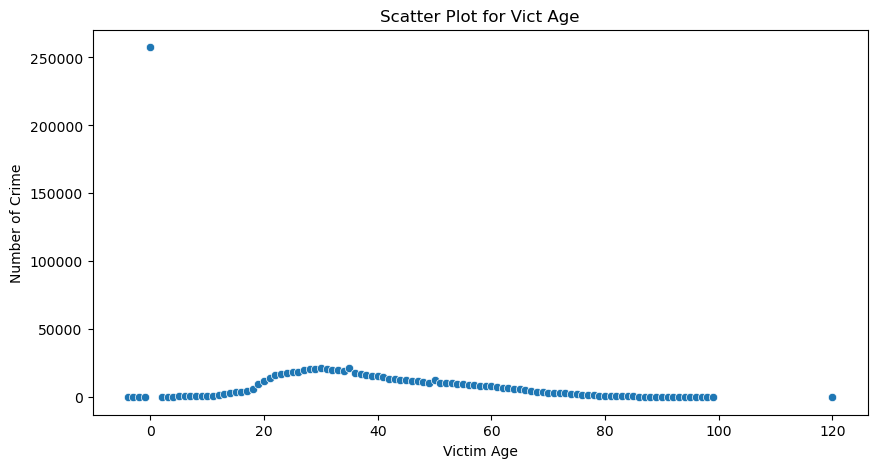

In [122]:
#Scatter Plot for Vict Age
age_wise = data_crime.groupby('Vict Age')['Crm Cd'].count()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=age_wise.index, y=age_wise.values)
plt.title('Scatter Plot for Vict Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crime')
plt.show()

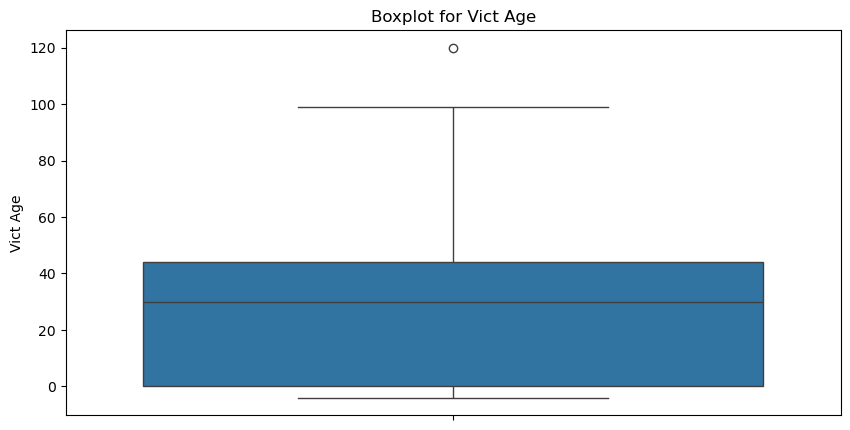

In [124]:
#Vict Age
plt.figure(figsize=(10, 5))
sns.boxplot(data_crime['Vict Age'])
plt.title('Boxplot for Vict Age')
plt.show()

# Demographic Factors:

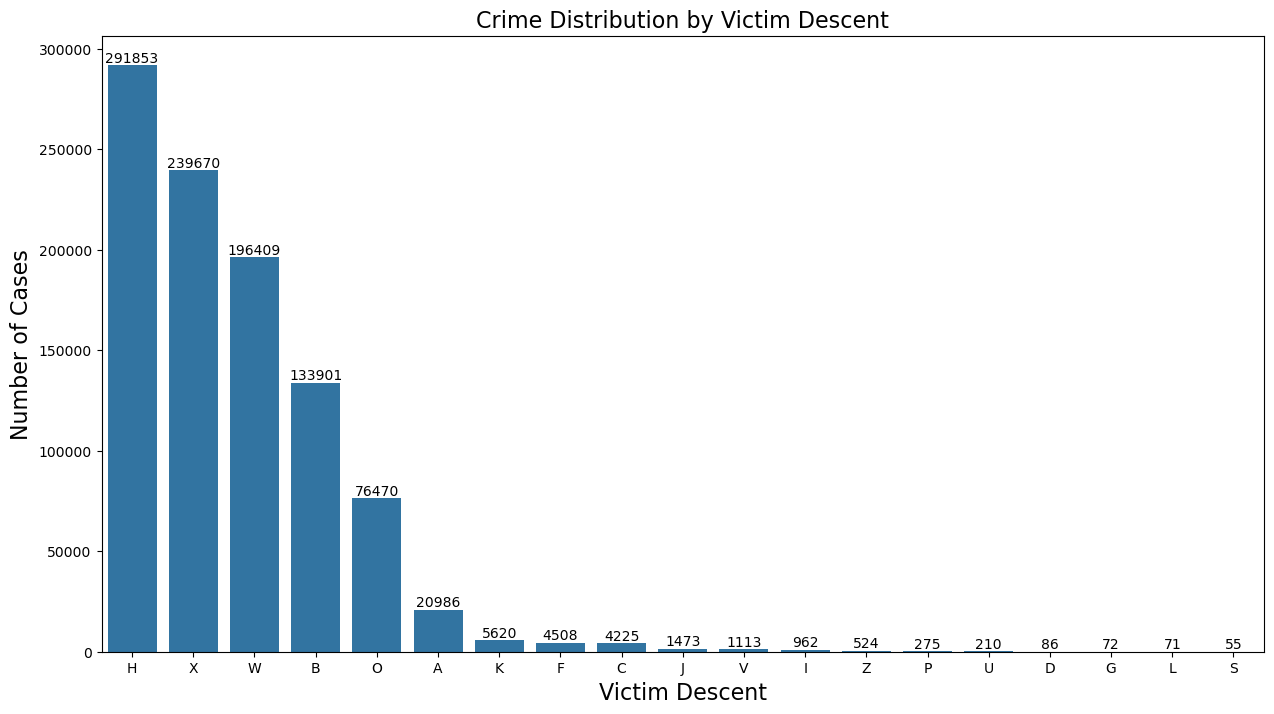

In [127]:
# Plotting Crime distribution by Victim Descent
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Vict Descent', data=crime_data, order=crime_data['Vict Descent'].value_counts().index)
plt.title('Crime Distribution by Victim Descent', fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xlabel('Victim Descent',fontsize = 16)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

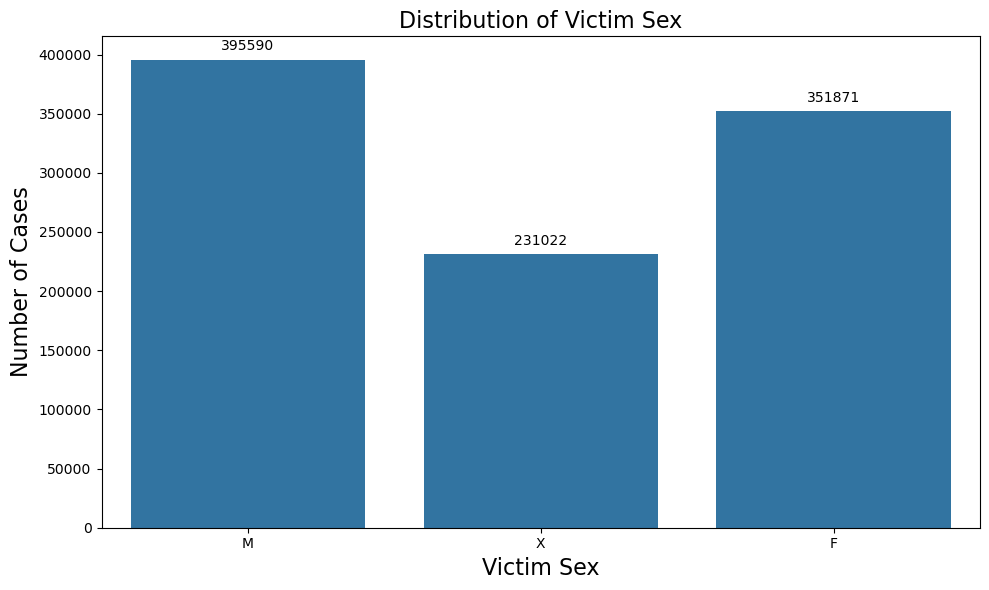

In [137]:
# Plotting Distribution of Victim Sex
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Vict Sex', data =crime_data)
plt.title('Distribution of Victim Sex',fontsize = 16)
plt.xlabel('Victim Sex',fontsize = 16)
plt.ylabel('Number of Cases',fontsize = 16)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

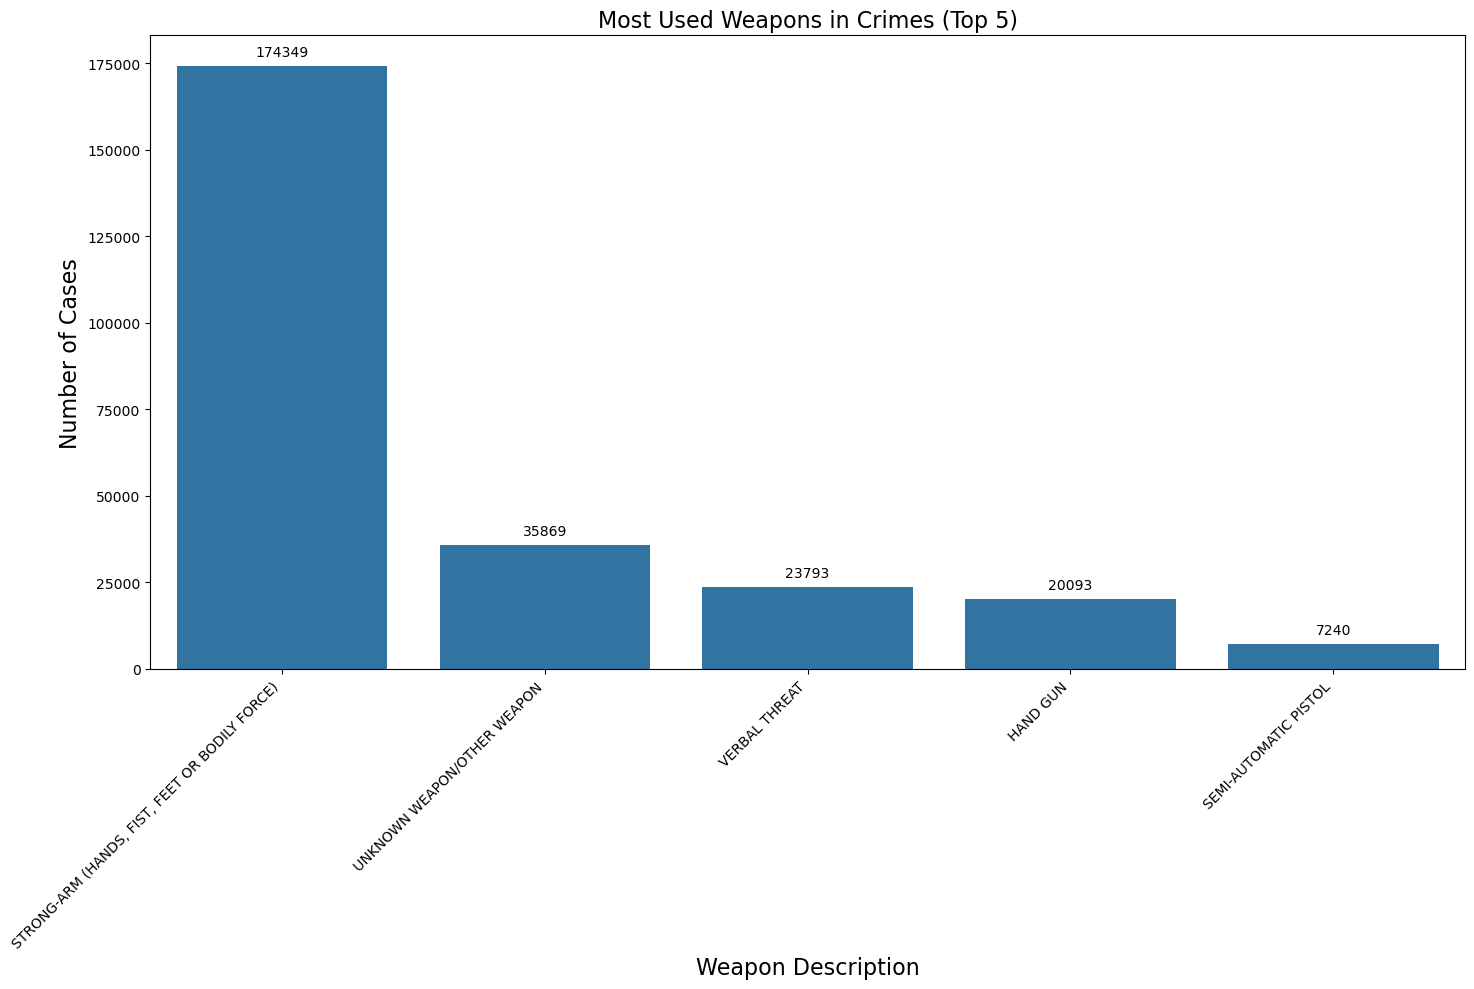

In [139]:
# Most Weapons Used in Crime
plt.figure(figsize=(15, 10))
top_5_weapons = data_crime['Weapon Desc'].value_counts().index[:5]
ax = sns.countplot(x='Weapon Desc', data=data_crime, order=top_5_weapons)
plt.title('Most Used Weapons in Crimes (Top 5)', fontsize = 16)
plt.xlabel('Weapon Description', fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 16)

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()